In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve



In [2]:
# Load the dataset
# Make sure 'data_file.csv' is in the same directory as your notebook, or provide the full path.
try:
    df = pd.read_csv('data_file.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'data_file.csv' not found. Please make sure the file is in the correct directory.")

Dataset loaded successfully!


In [19]:

k= df['Benign'].value_counts()
_0 = k[0]/(k[0]+k[1])
_1 = k[1]/(k[0]+k[1])
_0 - _1

np.float64(0.13201568376410333)

In [20]:
k[0], k[1]

(np.int64(35367), np.int64(27118))

In [21]:
df.columns

Index(['FileName', 'md5Hash', 'Machine', 'DebugSize', 'DebugRVA',
       'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize',
       'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
       'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics',
       'ResourceSize', 'BitcoinAddresses', 'Benign'],
      dtype='object')

In [5]:
# --- 1. Data Exploration and Preprocessing ---

# Drop non-numeric and identifier columns
if 'FileName' in df.columns and 'md5Hash' in df.columns:
    df = df.drop(['FileName', 'md5Hash'], axis=1)

In [6]:
# Separate features (X) and target (y)
X = df.drop('Benign', axis=1)
y = df['Benign']

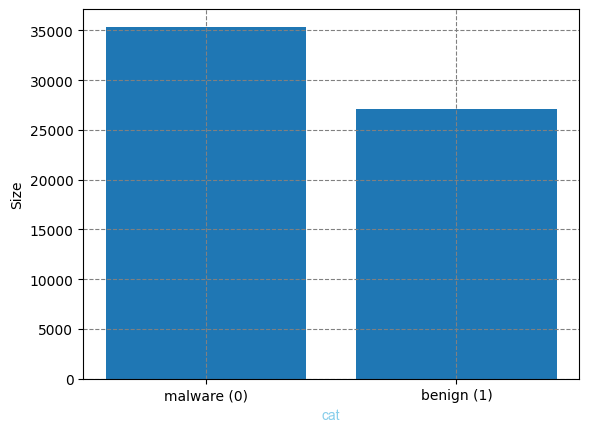

In [28]:
plt.bar(['malware (0)','benign (1)'], [k[0],k[1]])
plt.grid(ls = '--', color= 'gray')
plt.xlabel("cat", fontdict = {'family': 'Arial', 'color': 'skyblue', 'size': '20'})
plt.ylabel("Size")
plt.show()

In [7]:
# Split the data into training and testing sets
# Using stratify to maintain the same proportion of benign and malware samples in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# --- 2. Model Training ---

# Initialize the models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

In [10]:
# Train the models
log_reg.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
gb_clf.fit(X_train_scaled, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [11]:
# --- 3. Model Evaluation ---
# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test_scaled)
y_pred_gb = gb_clf.predict(X_test_scaled)

y_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]
y_proba_gb = gb_clf.predict_proba(X_test_scaled)[:, 1]


In [12]:
# Create a dictionary to store the models and their predictions
models = {
    'Logistic Regression': (y_pred_log_reg, y_proba_log_reg),
    'Random Forest': (y_pred_rf, y_proba_rf),
    'Gradient Boosting': (y_pred_gb, y_proba_gb)
}


In [13]:
# Calculate and display evaluation metrics
metrics = {}
for model_name, (y_pred, y_proba) in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    metrics[model_name] = [accuracy, precision, recall, f1, roc_auc]

metrics_df = pd.DataFrame.from_dict(metrics, orient='index',
                                   columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])
print("Evaluation Metrics:")
print(metrics_df)


Evaluation Metrics:
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression  0.870929   0.921851  0.767699  0.837743  0.962300
Random Forest        0.996479   0.996677  0.995206  0.995941  0.999705
Gradient Boosting    0.991038   0.993130  0.986173  0.989639  0.998607


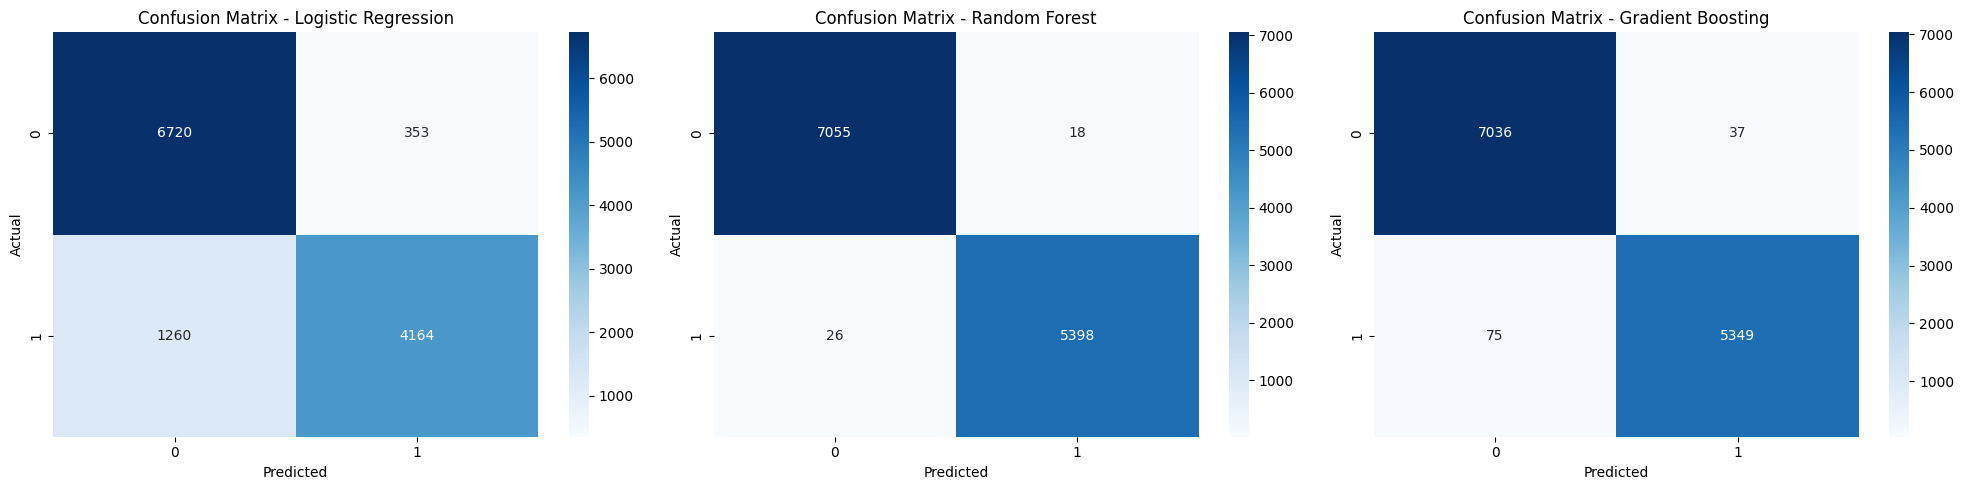

In [14]:
# --- 4. Visualizations ---

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (model_name, (y_pred, _)) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()



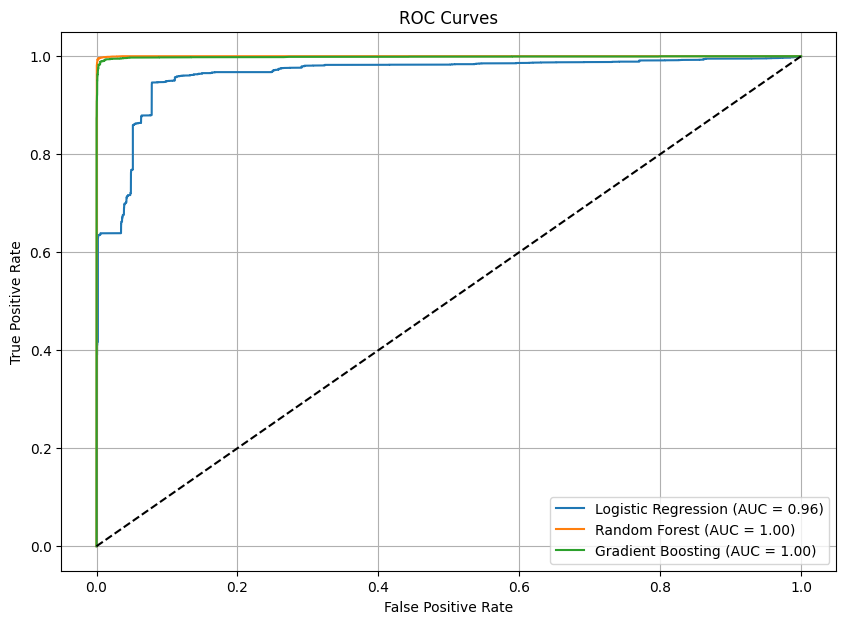

In [15]:
# Plot ROC Curves
plt.figure(figsize=(10, 7))
for model_name, (_, y_proba) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid()
plt.show()